Topic:        Challenge Set 1
Subject:      Explore MTA turnstile data
Date:         01/16/2018
Name:         Louisa Ying

## Challenge 1

In [77]:
import glob
from collections import defaultdict

def challenge_1(files):
    d = defaultdict(list)
    
    for file in files:
        with open(file) as f:
            file_iterator = iter(f)
            headers = next(file_iterator)

            for line in file_iterator:
                modified_line = line.strip().split(',')


                key = tuple(modified_line[0:4])
                value = modified_line[4:]

                if key in d:
                    d[key].append(value)
                else:
                    d[key] = [value]

    return d

#three txt files in the below path:
#turnstile_171230.txt
#turnstile_180106.txt
#turnstile_180113.txt

path = '/Users/*/Desktop/mta_turnstile_data/*.txt'
files = glob.iglob(path)

raw_data = challenge_1(files)


list(raw_data.items())[0]

(('A002', 'R051', '02-00-00', '59 ST'),
 [['NQR456W',
   'BMT',
   '12/23/2017',
   '03:00:00',
   'REGULAR',
   '0006455840',
   '0002184987'],
  ['NQR456W',
   'BMT',
   '12/23/2017',
   '07:00:00',
   'REGULAR',
   '0006455856',
   '0002184995'],
  ['NQR456W',
   'BMT',
   '12/23/2017',
   '11:00:00',
   'REGULAR',
   '0006455899',
   '0002185082'],
  ['NQR456W',
   'BMT',
   '12/23/2017',
   '15:00:00',
   'REGULAR',
   '0006456038',
   '0002185156'],
  ['NQR456W',
   'BMT',
   '12/23/2017',
   '19:00:00',
   'REGULAR',
   '0006456327',
   '0002185197'],
  ['NQR456W',
   'BMT',
   '12/23/2017',
   '23:00:00',
   'REGULAR',
   '0006456484',
   '0002185222'],
  ['NQR456W',
   'BMT',
   '12/24/2017',
   '03:00:00',
   'REGULAR',
   '0006456525',
   '0002185229'],
  ['NQR456W',
   'BMT',
   '12/24/2017',
   '07:00:00',
   'REGULAR',
   '0006456535',
   '0002185245'],
  ['NQR456W',
   'BMT',
   '12/24/2017',
   '11:00:00',
   'REGULAR',
   '0006456582',
   '0002185295'],
  ['NQR456W',
 

In [18]:
import dateutil.parser
s = 'A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,03:00:00,REGULAR,0006463109,0002187558'
l = s.split(',')
time = ', '.join(l[6:8])
dateutil.parser.parse(time)

datetime.datetime(2017, 12, 30, 3, 0)

## Challenge 2

In [83]:
import dateutil.parser
from collections import defaultdict

def challenge_2(files):
    d = defaultdict(list)
    for file in files:
        print(file)
        with open(file) as f:  
            file_iterator = iter(f)
            headers = next(file_iterator)

            for line in file_iterator:
                modified_line = line.strip().split(',')

                key = tuple(modified_line[0:4])
                time = ', '.join(modified_line[6:8])

                value = [dateutil.parser.parse(time), int(modified_line[9])]

                if key in d:
                    d[key].append(value)
                else:
                    d[key] = [value]
    return d

path = '/Users/*/Desktop/mta_turnstile_data/*.txt'
files = glob.iglob(path)

datetime_count = challenge_2(files)
list(datetime_count.items())[0]

/Users/louisaying/Desktop/mta_turnstile_data/turnstile_171230.txt
/Users/louisaying/Desktop/mta_turnstile_data/turnstile_180106.txt
/Users/louisaying/Desktop/mta_turnstile_data/turnstile_180113.txt


(('A002', 'R051', '02-00-00', '59 ST'),
 [[datetime.datetime(2017, 12, 23, 3, 0), 6455840],
  [datetime.datetime(2017, 12, 23, 7, 0), 6455856],
  [datetime.datetime(2017, 12, 23, 11, 0), 6455899],
  [datetime.datetime(2017, 12, 23, 15, 0), 6456038],
  [datetime.datetime(2017, 12, 23, 19, 0), 6456327],
  [datetime.datetime(2017, 12, 23, 23, 0), 6456484],
  [datetime.datetime(2017, 12, 24, 3, 0), 6456525],
  [datetime.datetime(2017, 12, 24, 7, 0), 6456535],
  [datetime.datetime(2017, 12, 24, 11, 0), 6456582],
  [datetime.datetime(2017, 12, 24, 15, 0), 6456748],
  [datetime.datetime(2017, 12, 24, 19, 0), 6456991],
  [datetime.datetime(2017, 12, 24, 23, 0), 6457068],
  [datetime.datetime(2017, 12, 25, 3, 0), 6457090],
  [datetime.datetime(2017, 12, 25, 7, 0), 6457093],
  [datetime.datetime(2017, 12, 25, 11, 0), 6457113],
  [datetime.datetime(2017, 12, 25, 15, 0), 6457172],
  [datetime.datetime(2017, 12, 25, 19, 0), 6457247],
  [datetime.datetime(2017, 12, 25, 23, 0), 6457304],
  [datetime.

## Challenge 3

In [84]:
import datetime
from collections import defaultdict

def challenge_3(d):
    new_d = defaultdict(list)
    count_for_current_date = 0

    for key, val in d.items():
        date = val[0][0].date()
        entries_count_first = val[0][1]

        for i, v in enumerate(val):
            if v[0].date() != date:            
                value = [date, val[i-1][1] - entries_count_first]
                if key in new_d:
                    new_d[key].append(value)
                else:
                    new_d[key] = [value]

                entries_count_first = v[1]
                date = v[0].date()

        if key in new_d:
            new_d[key].append([date, val[-1][1] - entries_count_first])
        else:
            new_d[key] = [[date, val[-1][1] - entries_count_first]]
    
    return new_d

datetime_unique_count = challenge_3(datetime_count)
    
list(datetime_unique_count.items())[0]


(('A002', 'R051', '02-00-00', '59 ST'),
 [[datetime.date(2017, 12, 23), 644],
  [datetime.date(2017, 12, 24), 543],
  [datetime.date(2017, 12, 25), 214],
  [datetime.date(2017, 12, 26), 1299],
  [datetime.date(2017, 12, 27), 1465],
  [datetime.date(2017, 12, 28), 1387],
  [datetime.date(2017, 12, 29), 1497],
  [datetime.date(2017, 12, 30), 778],
  [datetime.date(2017, 12, 31), 517],
  [datetime.date(2018, 1, 1), 432],
  [datetime.date(2018, 1, 2), 1456],
  [datetime.date(2018, 1, 3), 1554],
  [datetime.date(2018, 1, 4), 820],
  [datetime.date(2018, 1, 5), 1371],
  [datetime.date(2018, 1, 6), 593],
  [datetime.date(2018, 1, 7), 484],
  [datetime.date(2018, 1, 8), 1406],
  [datetime.date(2018, 1, 9), 1482],
  [datetime.date(2018, 1, 10), 1482],
  [datetime.date(2018, 1, 11), 1517],
  [datetime.date(2018, 1, 12), 1471]])

## Challenge 4

In [85]:
lst = datetime_unique_count[('A002','R051','02-00-00','59 ST')]
dates = []
counts = []
for l in lst:
    dates.append(l[0])
    counts.append(l[1])
  

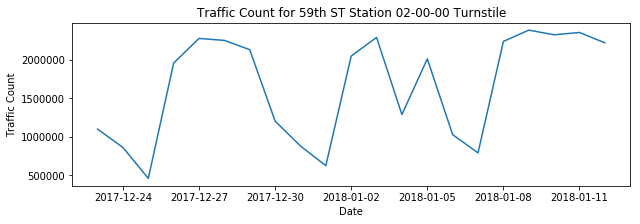

In [124]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.plot(dates,counts)
plt.title('Traffic Count for 59th ST Station 02-00-00 Turnstile')
plt.xlabel('Date')
plt.ylabel('Traffic Count');

## Challenge 5

In [88]:
def challenge_5(d):
    result = {}

    for identifiers, date_count_pairs in d.items():
        CA_UNIT_STATION_list = list(identifiers[0:2])
        CA_UNIT_STATION_list.append(identifiers[3])
        CA_UNIT_STATION = tuple(CA_UNIT_STATION_list)


        if CA_UNIT_STATION in result:
            result_date_count_pairs = result[CA_UNIT_STATION]
            
            _merge_date_time_pairs(date_count_pairs, result_date_count_pairs)

        else:
            result[CA_UNIT_STATION] = date_count_pairs

    return result

def _merge_date_time_pairs(date_count_pairs, result_date_count_pairs):
    for date_count_pair in date_count_pairs:
        found = False
        for result_date_count_pair in result_date_count_pairs:
            if result_date_count_pair[0] == date_count_pair[0]:
                result_date_count_pair[1] += date_count_pair[1]
                found = True
        if not found:
            result_date_count_pairs.append(date_count_pair)

list((challenge_5(datetime_unique_count)).items())[0]

(('A002', 'R051', '59 ST'),
 [[datetime.date(2017, 12, 23), 6137],
  [datetime.date(2017, 12, 24), 4852],
  [datetime.date(2017, 12, 25), 2858],
  [datetime.date(2017, 12, 26), 11084],
  [datetime.date(2017, 12, 27), 13508],
  [datetime.date(2017, 12, 28), 13111],
  [datetime.date(2017, 12, 29), 12907],
  [datetime.date(2017, 12, 30), 7328],
  [datetime.date(2017, 12, 31), 5427],
  [datetime.date(2018, 1, 1), 4480],
  [datetime.date(2018, 1, 2), 12369],
  [datetime.date(2018, 1, 3), 13283],
  [datetime.date(2018, 1, 4), 8082],
  [datetime.date(2018, 1, 5), 11871],
  [datetime.date(2018, 1, 6), 6451],
  [datetime.date(2018, 1, 7), 4973],
  [datetime.date(2018, 1, 8), 12516],
  [datetime.date(2018, 1, 9), 13400],
  [datetime.date(2018, 1, 10), 13271],
  [datetime.date(2018, 1, 11), 13269],
  [datetime.date(2018, 1, 12), 12551]])

## Challenge 6

In [89]:
def challenge_6(d):
    result = {}

    for identifiers, date_count_pairs in d.items():
        STATION = identifiers[3]

        if STATION in result:
            result_date_count_pairs = result[STATION]
            
            _merge_date_time_pairs(date_count_pairs, result_date_count_pairs)

        else:
            result[STATION] = date_count_pairs

    return result

def _merge_date_time_pairs(date_count_pairs, result_date_count_pairs):
    for date_count_pair in date_count_pairs:
        found = False
        for result_date_count_pair in result_date_count_pairs:
            if result_date_count_pair[0] == date_count_pair[0]:
                result_date_count_pair[1] += date_count_pair[1]
                found = True
        if not found:
            result_date_count_pairs.append(date_count_pair)

list((challenge_6(datetime_unique_count)).items())[0]

('59 ST',
 [[datetime.date(2017, 12, 23), 53644],
  [datetime.date(2017, 12, 24), 42097],
  [datetime.date(2017, 12, 25), 22750],
  [datetime.date(2017, 12, 26), 95615],
  [datetime.date(2017, 12, 27), 111792],
  [datetime.date(2017, 12, 28), 110308],
  [datetime.date(2017, 12, 29), 104864],
  [datetime.date(2017, 12, 30), 59312],
  [datetime.date(2017, 12, 31), 43462],
  [datetime.date(2018, 1, 1), 31473],
  [datetime.date(2018, 1, 2), 100800],
  [datetime.date(2018, 1, 3), 112123],
  [datetime.date(2018, 1, 4), 63718],
  [datetime.date(2018, 1, 5), 98732],
  [datetime.date(2018, 1, 6), 50841],
  [datetime.date(2018, 1, 7), 39139],
  [datetime.date(2018, 1, 8), 109172],
  [datetime.date(2018, 1, 9), 116369],
  [datetime.date(2018, 1, 10), 113628],
  [datetime.date(2018, 1, 11), 114922],
  [datetime.date(2018, 1, 12), 108416]])

## Challenge 7

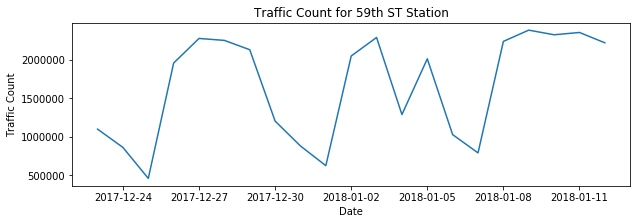

In [123]:
stations_d = challenge_6(datetime_unique_count)
station_59_st = stations_d[('59 ST')]

dates = []
counts = []
for pair in station_59_st:
    dates.append(pair[0])
    counts.append(pair[1])

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.plot(dates,counts)
plt.title('Traffic Count for 59th ST Station')
plt.xlabel('Date')
plt.ylabel('Traffic Count');

## Challenge 8

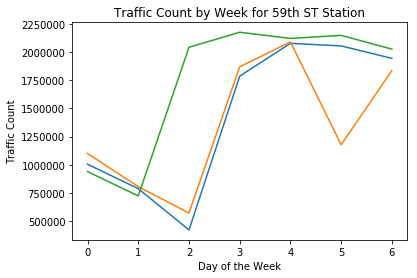

In [121]:
def challenge_8(date_count_pairs):
    week_count_list = []
    for date_count_pair in date_count_pairs:
        week_count_list.append(date_count_pair[1])
        if len(week_count_list) == 7:
            plt.plot(week_count_list)
            week_count_list = []
plt.title('Traffic Count by Week for 59th ST Station')
plt.xlabel('Day of the Week')
plt.ylabel('Traffic Count')
challenge_8(station_59_st)

## Challenge 9

In [114]:
#Over multiple weeks, sum total ridership for each station and sort them, 
#so you can find out the stations with the highest traffic during the time you investigate

def challenge_9(d):
    total_ridership_by_station = []
    for station, date_count_pairs in d.items():
        total_ridership = 0
        for date_count_pair in date_count_pairs:
            total_ridership += date_count_pair[1]
            
        total_ridership_by_station.append((station, total_ridership))
    
    total_ridership_by_station.sort(key = lambda x: x[1])
    
    return total_ridership_by_station
    
challenge_9(challenge_6(datetime_unique_count))[::-1]

[('THIRTY THIRD ST', 22885058735),
 ('RIT-ROOSEVELT', 10241272607),
 ('NEWARK HW BMEBE', 755711214),
 ('BAY PKWY', 442568864),
 ('34 ST-PENN STA', 76942326),
 ('GRD CNTRL-42 ST', 67571574),
 ('34 ST-HERALD SQ', 47470834),
 ('TIMES SQ-42 ST', 45414158),
 ('23 ST', 41596912),
 ('FULTON ST', 41274265),
 ('86 ST', 41197578),
 ('14 ST-UNION SQ', 39472576),
 ('42 ST-PORT AUTH', 37197231),
 ('125 ST', 30526846),
 ('59 ST COLUMBUS', 30085078),
 ('59 ST', 28693259),
 ('96 ST', 28298781),
 ('CANAL ST', 26834024),
 ('JAMAICA 179 ST', 25978008),
 ('47-50 STS ROCK', 25125980),
 ('CHAMBERS ST', 24431278),
 ('JKSN HT-ROOSVLT', 24424290),
 ('ATL AV-BARCLAY', 21680015),
 ('FLUSHING-MAIN', 21596180),
 ('14 ST', 19556549),
 ('28 ST', 19478147),
 ('JAY ST-METROTEC', 19211178),
 ('72 ST', 18540945),
 ('CHURCH AV', 17216528),
 ('42 ST-BRYANT PK', 16630726),
 ('WALL ST', 16473241),
 ('LEXINGTON AV/53', 15178265),
 ('BOROUGH HALL', 14982445),
 ('116 ST', 14353630),
 ('GRAND ST', 14248972),
 ('7 AV', 13939801)

## Challenge 10 

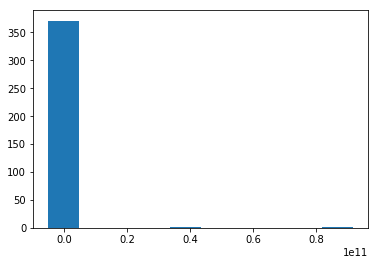

In [116]:
total_ridership_by_station = challenge_9(challenge_6(datetime_unique_count))

def challenge_10(total_ridership_by_station):
    total_ridership = []
    for station_total_pair in total_ridership_by_station:
        total_ridership.append(station_total_pair[1])
    
    return total_ridership

total_ridership_counts = challenge_10(total_ridership_by_station)
plt.hist(total_ridership_counts);

#did not clean data for the challenges - there are a few outliers that is causing the x axis 
#of the histogram to stretch farther out

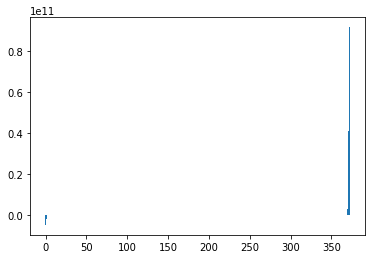

In [118]:
indices = range(len(total_ridership_counts))
plt.bar(indices, total_ridership_counts);